# Creditcard Defaulter Prediction EDA

In [6]:
# Importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mean
import warnings

from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay,precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier


warnings.filterwarnings("ignore")
%matplotlib inline

## Read Data

In [51]:
df = pd.read_csv("UCI_Credit_Card.csv")
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [52]:
# checking rows and columns for the dataset
df.shape

(30000, 25)

In [53]:
# columns
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

### Observations :-
- Here "ID" feature is not required for our analysis,so remove "ID" column

In [54]:
# dropping "ID" column
df.drop("ID",axis = 1,inplace = True)

In [55]:
# DataFrame after removing one column
df.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1


In [56]:
# Describing the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

In [57]:
# defining numerical and categorical features
numerical_features = [feature for feature in df.columns if df[feature].dtype != "O"]
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]

# Printing numerical and categorical features
print("We have {} Numerical features : {}".format(len(numerical_features),numerical_features))
print("We have {} Categorical features : {}".format(len(categorical_features),categorical_features))

We have 24 Numerical features : ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month']
We have 0 Categorical features : []


### Observations :-
- Here we have all 24 numerical columns
- We no need to label encode features

## Checking missing values :-

In [58]:
# checking null values
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

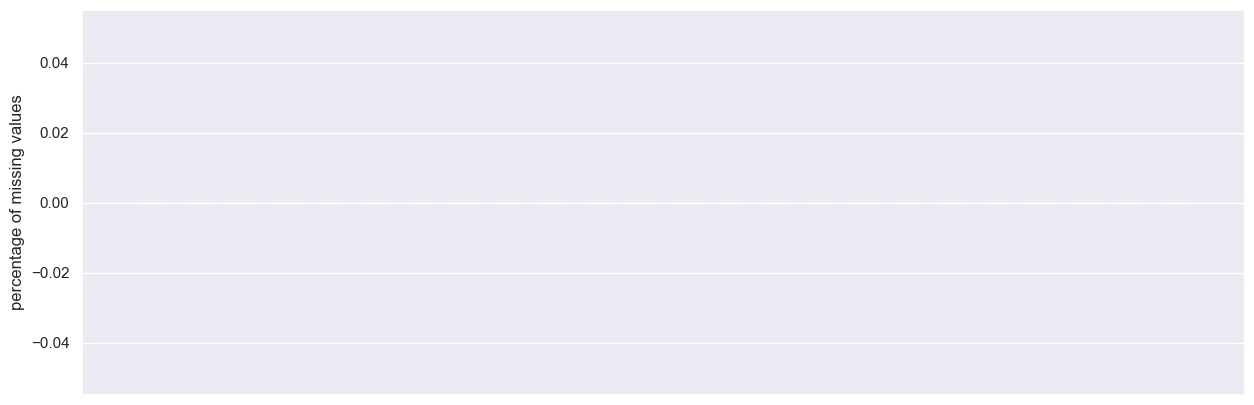

In [59]:
# Plotting missing values count for each column

fig,ax = plt.subplots(figsize=(15,5))
missing = df.isnull().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by = 0,ascending = False)

ax.bar(missing.index,missing.values.T[0])
plt.xticks([])
plt.ylabel("percentage of missing values")
plt.show()

### Observations :-
- Here No missing values are present
- No need to perform any imputations

## Checking duplicates

In [60]:
df.duplicated().sum()

35

### Observations :-
- Here No missing values are present
- No need to perform any imputations

In [61]:
# Removing duplicates
df.drop_duplicates(inplace = True )

In [18]:
df.shape

(29965, 24)

## Checking outliers

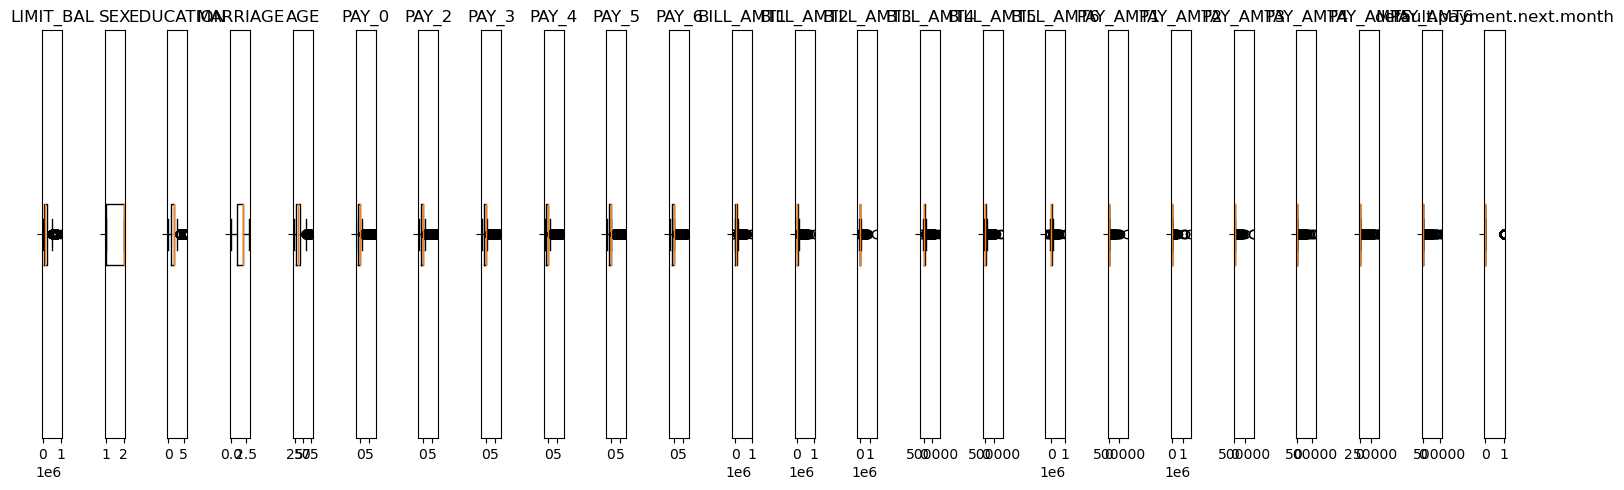

In [19]:
# Create a figure with subplots
fig, axes = plt.subplots(1, len(numerical_features), figsize=(15, 5))

# Plot boxplots for each column in a subplot
for i, column in enumerate(numerical_features):
    axes[i].boxplot(df[column], vert=False)
    axes[i].set_title(column)
    axes[i].set_yticklabels([])

plt.tight_layout()
plt.show()



### *Checking the whether the dataset is imbalanced or not

In [20]:
df["default.payment.next.month"].value_counts()

0    23335
1     6630
Name: default.payment.next.month, dtype: int64

### Visualization of unique values in Target Variable

defaulters : 23335 and non defaulters : 6630


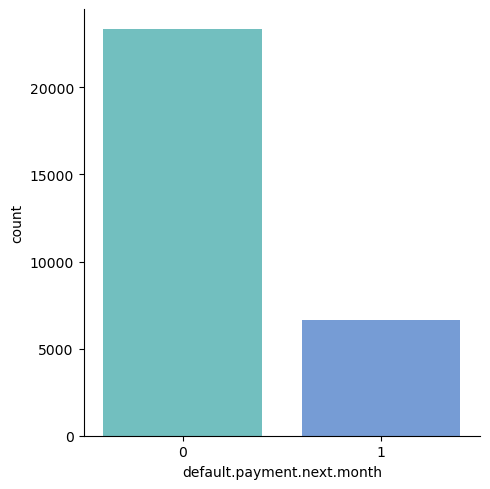

In [21]:
default = df[df["default.payment.next.month"]==0].shape[0]
non_default = df[df["default.payment.next.month"]==1].shape[0]
print(f"defaulters : {default} and non defaulters : {non_default}")
sns.catplot(data=df,x="default.payment.next.month",kind= "count",palette="winter_r",alpha= .6)
plt.show()

### Observations :-
- Here the dataset is imbalanced
- But no need to perform resampling ,because the defaulters are obviously less in count

<Axes: >

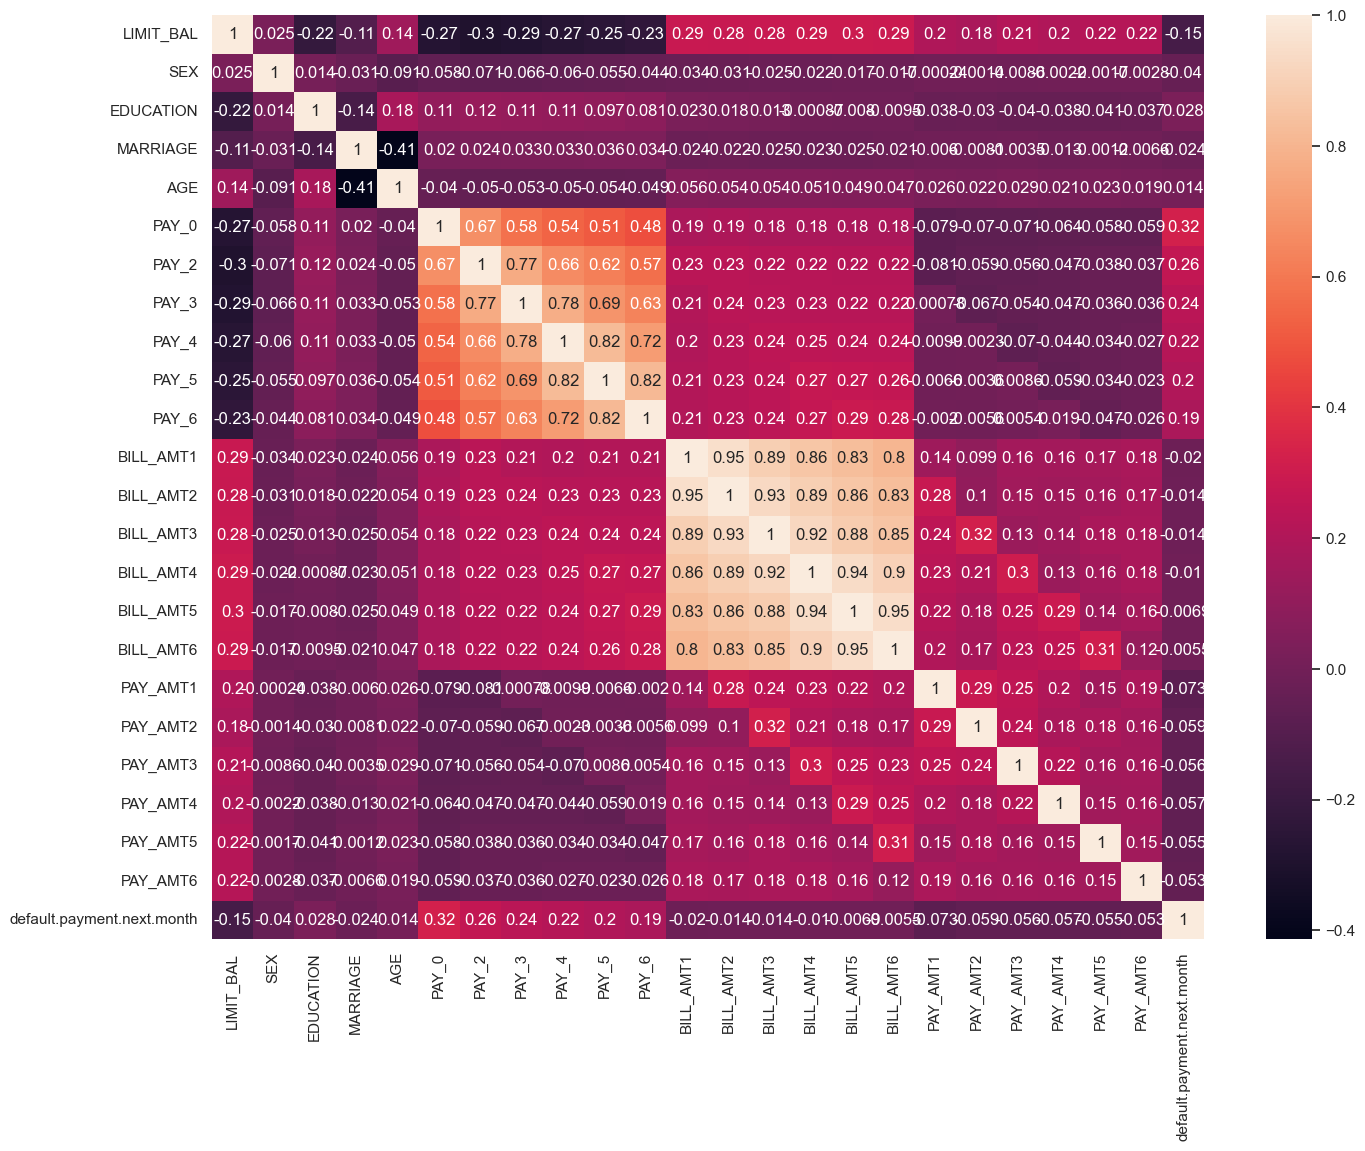

In [22]:
sns.set(rc= {'figure.figsize':(16,12)})
sns.heatmap(df.corr(),annot= True)

# Exploratory Data Analysis
### Univariate and Bivariate Analysis

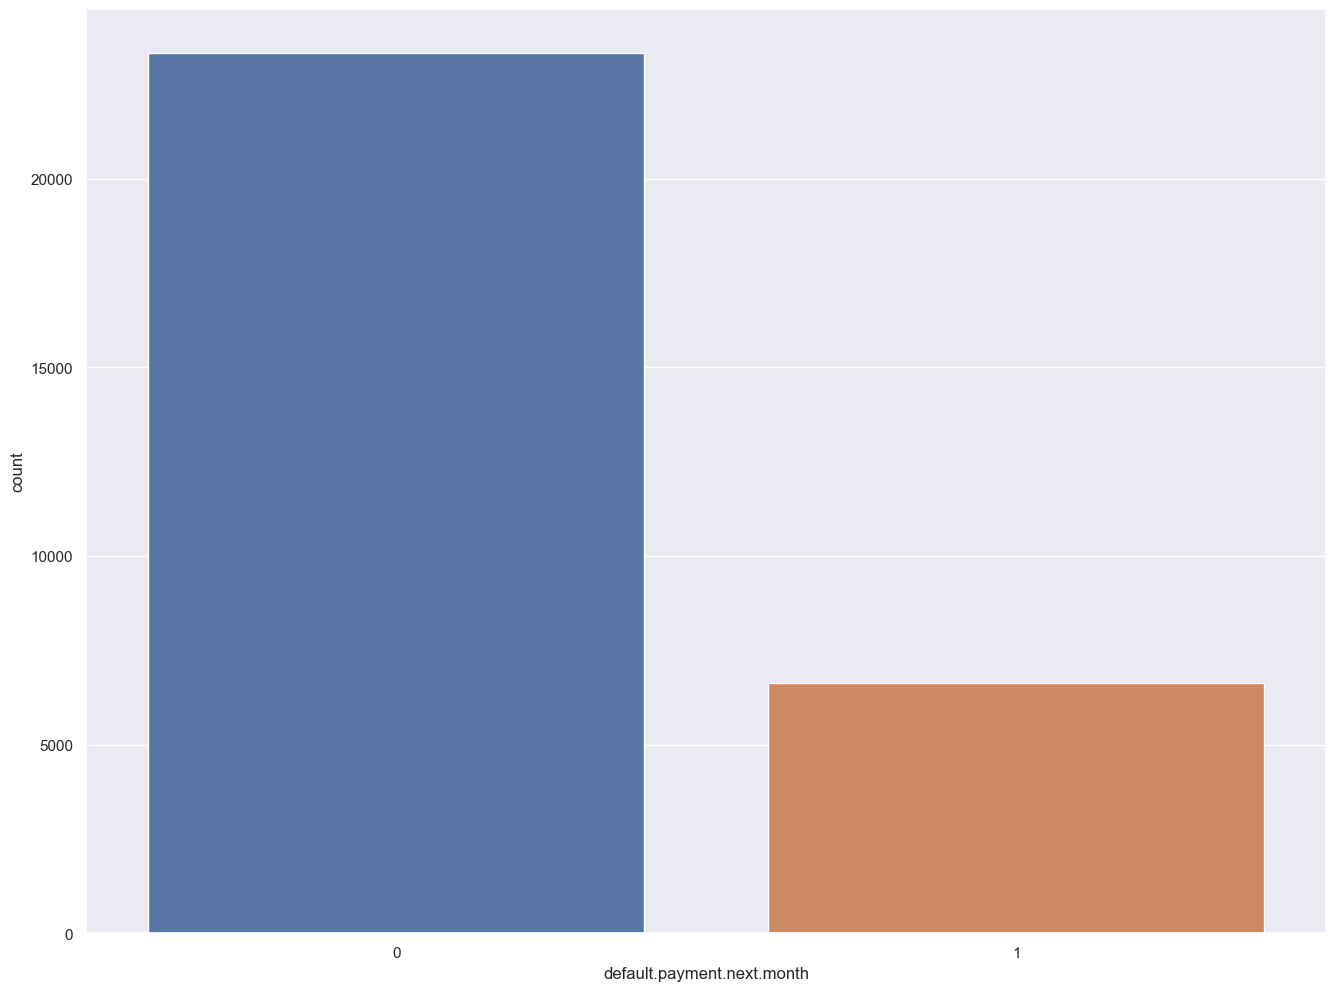

In [26]:
sns.countplot(df,x="default.payment.next.month")
plt.show()

**Conclusion**
* Data is non equally distributed
* Non defaulters are much more in number than defaulters
* Will make it equally distributed using SMOTE

#### Univariate analysis of Repayment status feature

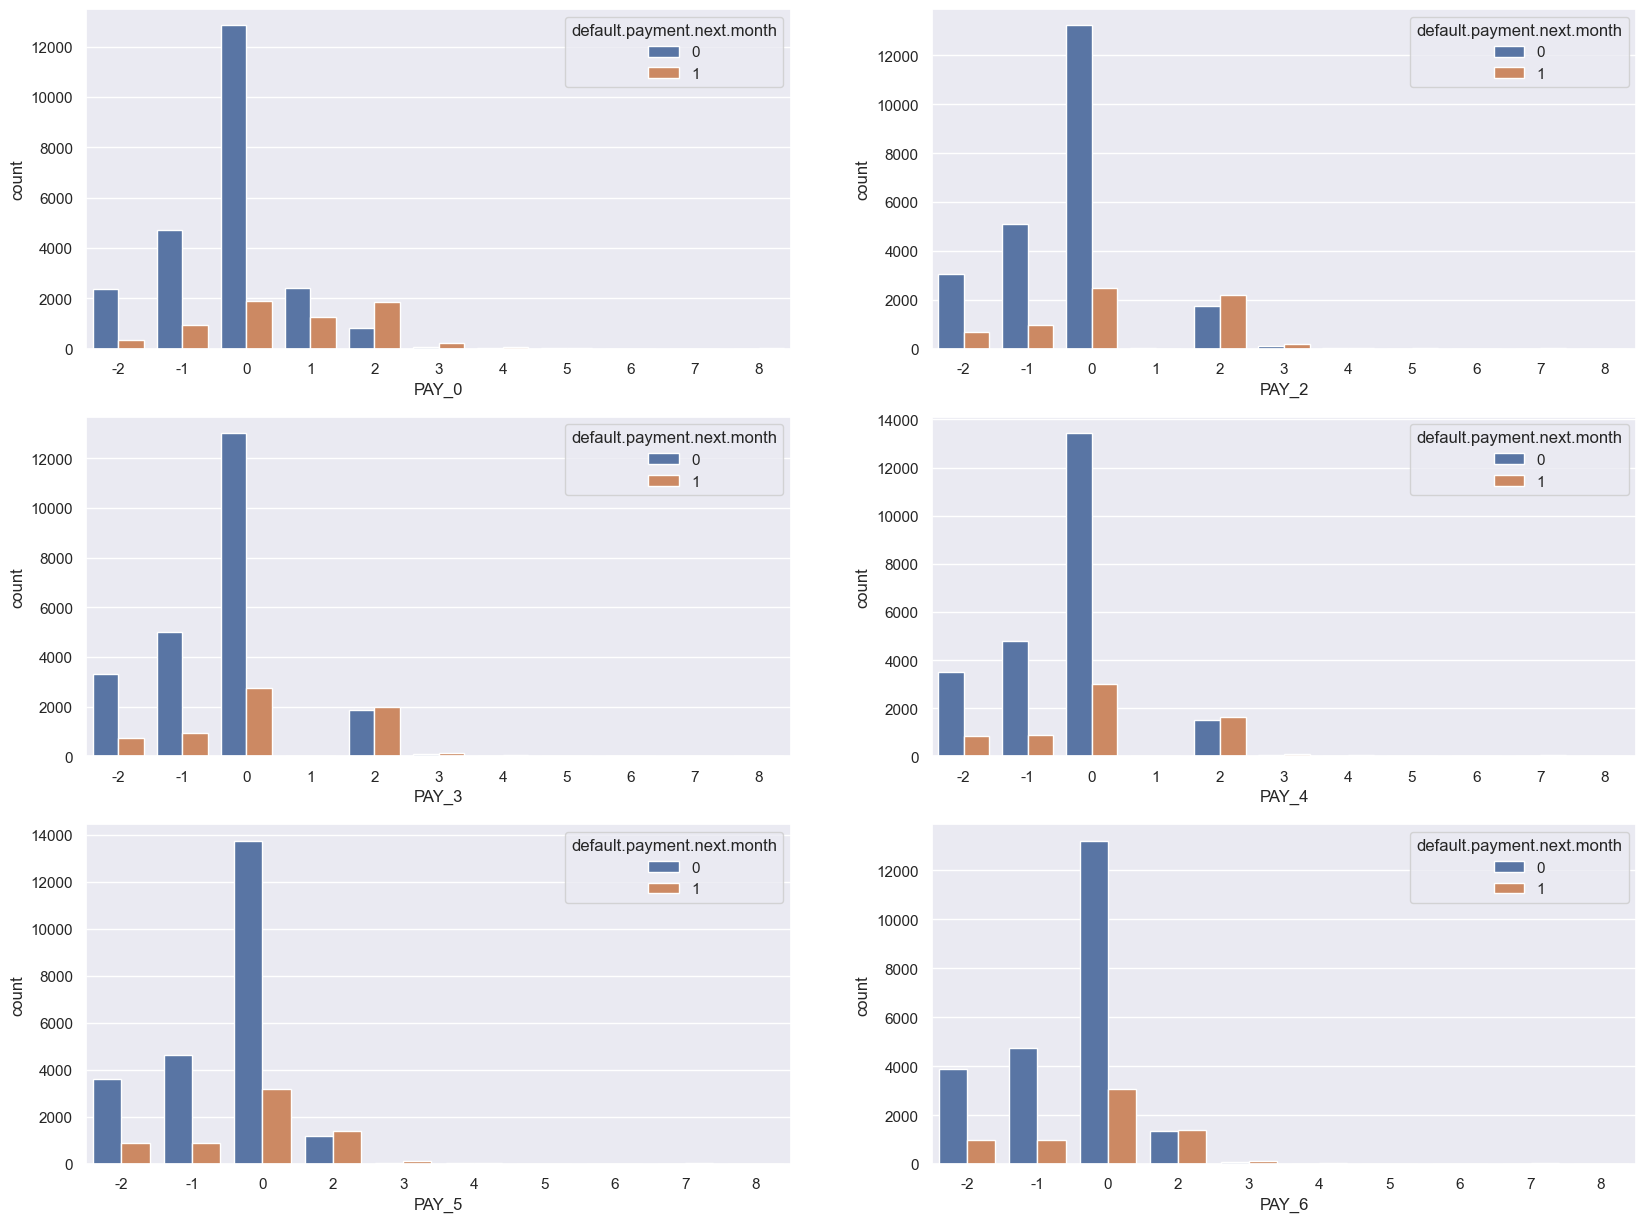

In [27]:
code_months_columns = df.loc[:,'PAY_0': 'PAY_6'].columns
figure, axes = plt.subplots(3,2,figsize=(20,15))
for i,column in enumerate(code_months_columns):
    row , col = divmod(i,2)
    ax=axes[row,col]
    sns.countplot(data =df, x=column,hue='default.payment.next.month',ax=ax)

**Interpretations**
* Usage of Revolving Credit: The dataset reveals that, irrespective of being a defaulter or non-defaulter, a significant number of users are engaged with revolving credit services.
* Defaulters with Revolving Credit: Notably, even among defaulters, a substantial number of individuals utilize revolving credit services.
* Rare Extended Delays: There are very few instances where users have delayed their payments for four months or more. This suggests that a vast majority of users tend to make timely payments

#### Bivariate analysis[AGE and MARRIAGE]

<Axes: xlabel='MARRIAGE', ylabel='count'>

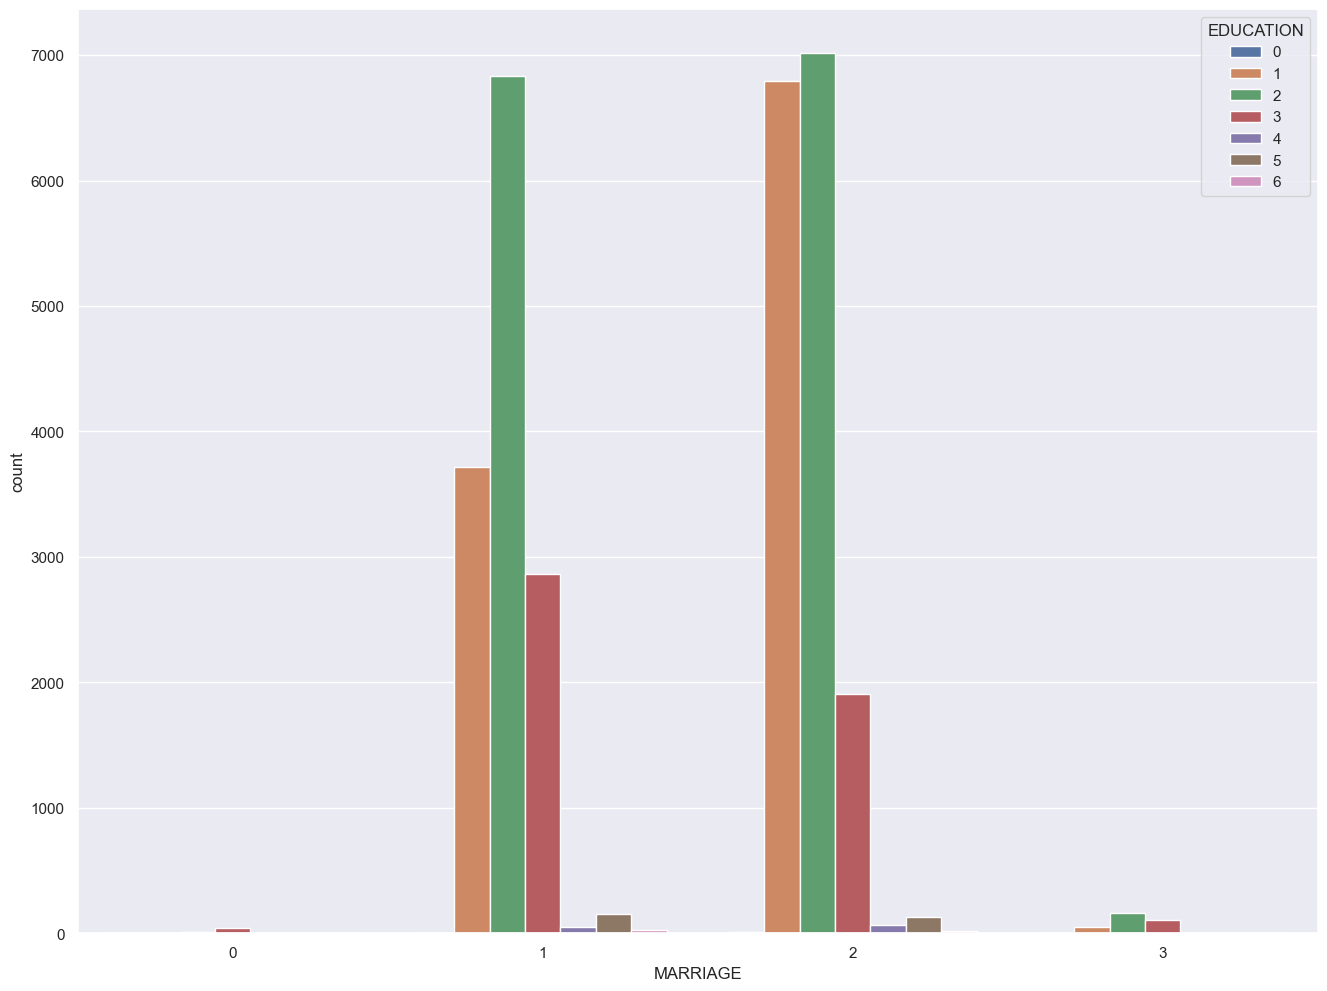

In [30]:
sns.countplot(data = df,x='MARRIAGE',hue="EDUCATION")

#### Bivariate analysis[AGE and MARRIAGE]

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

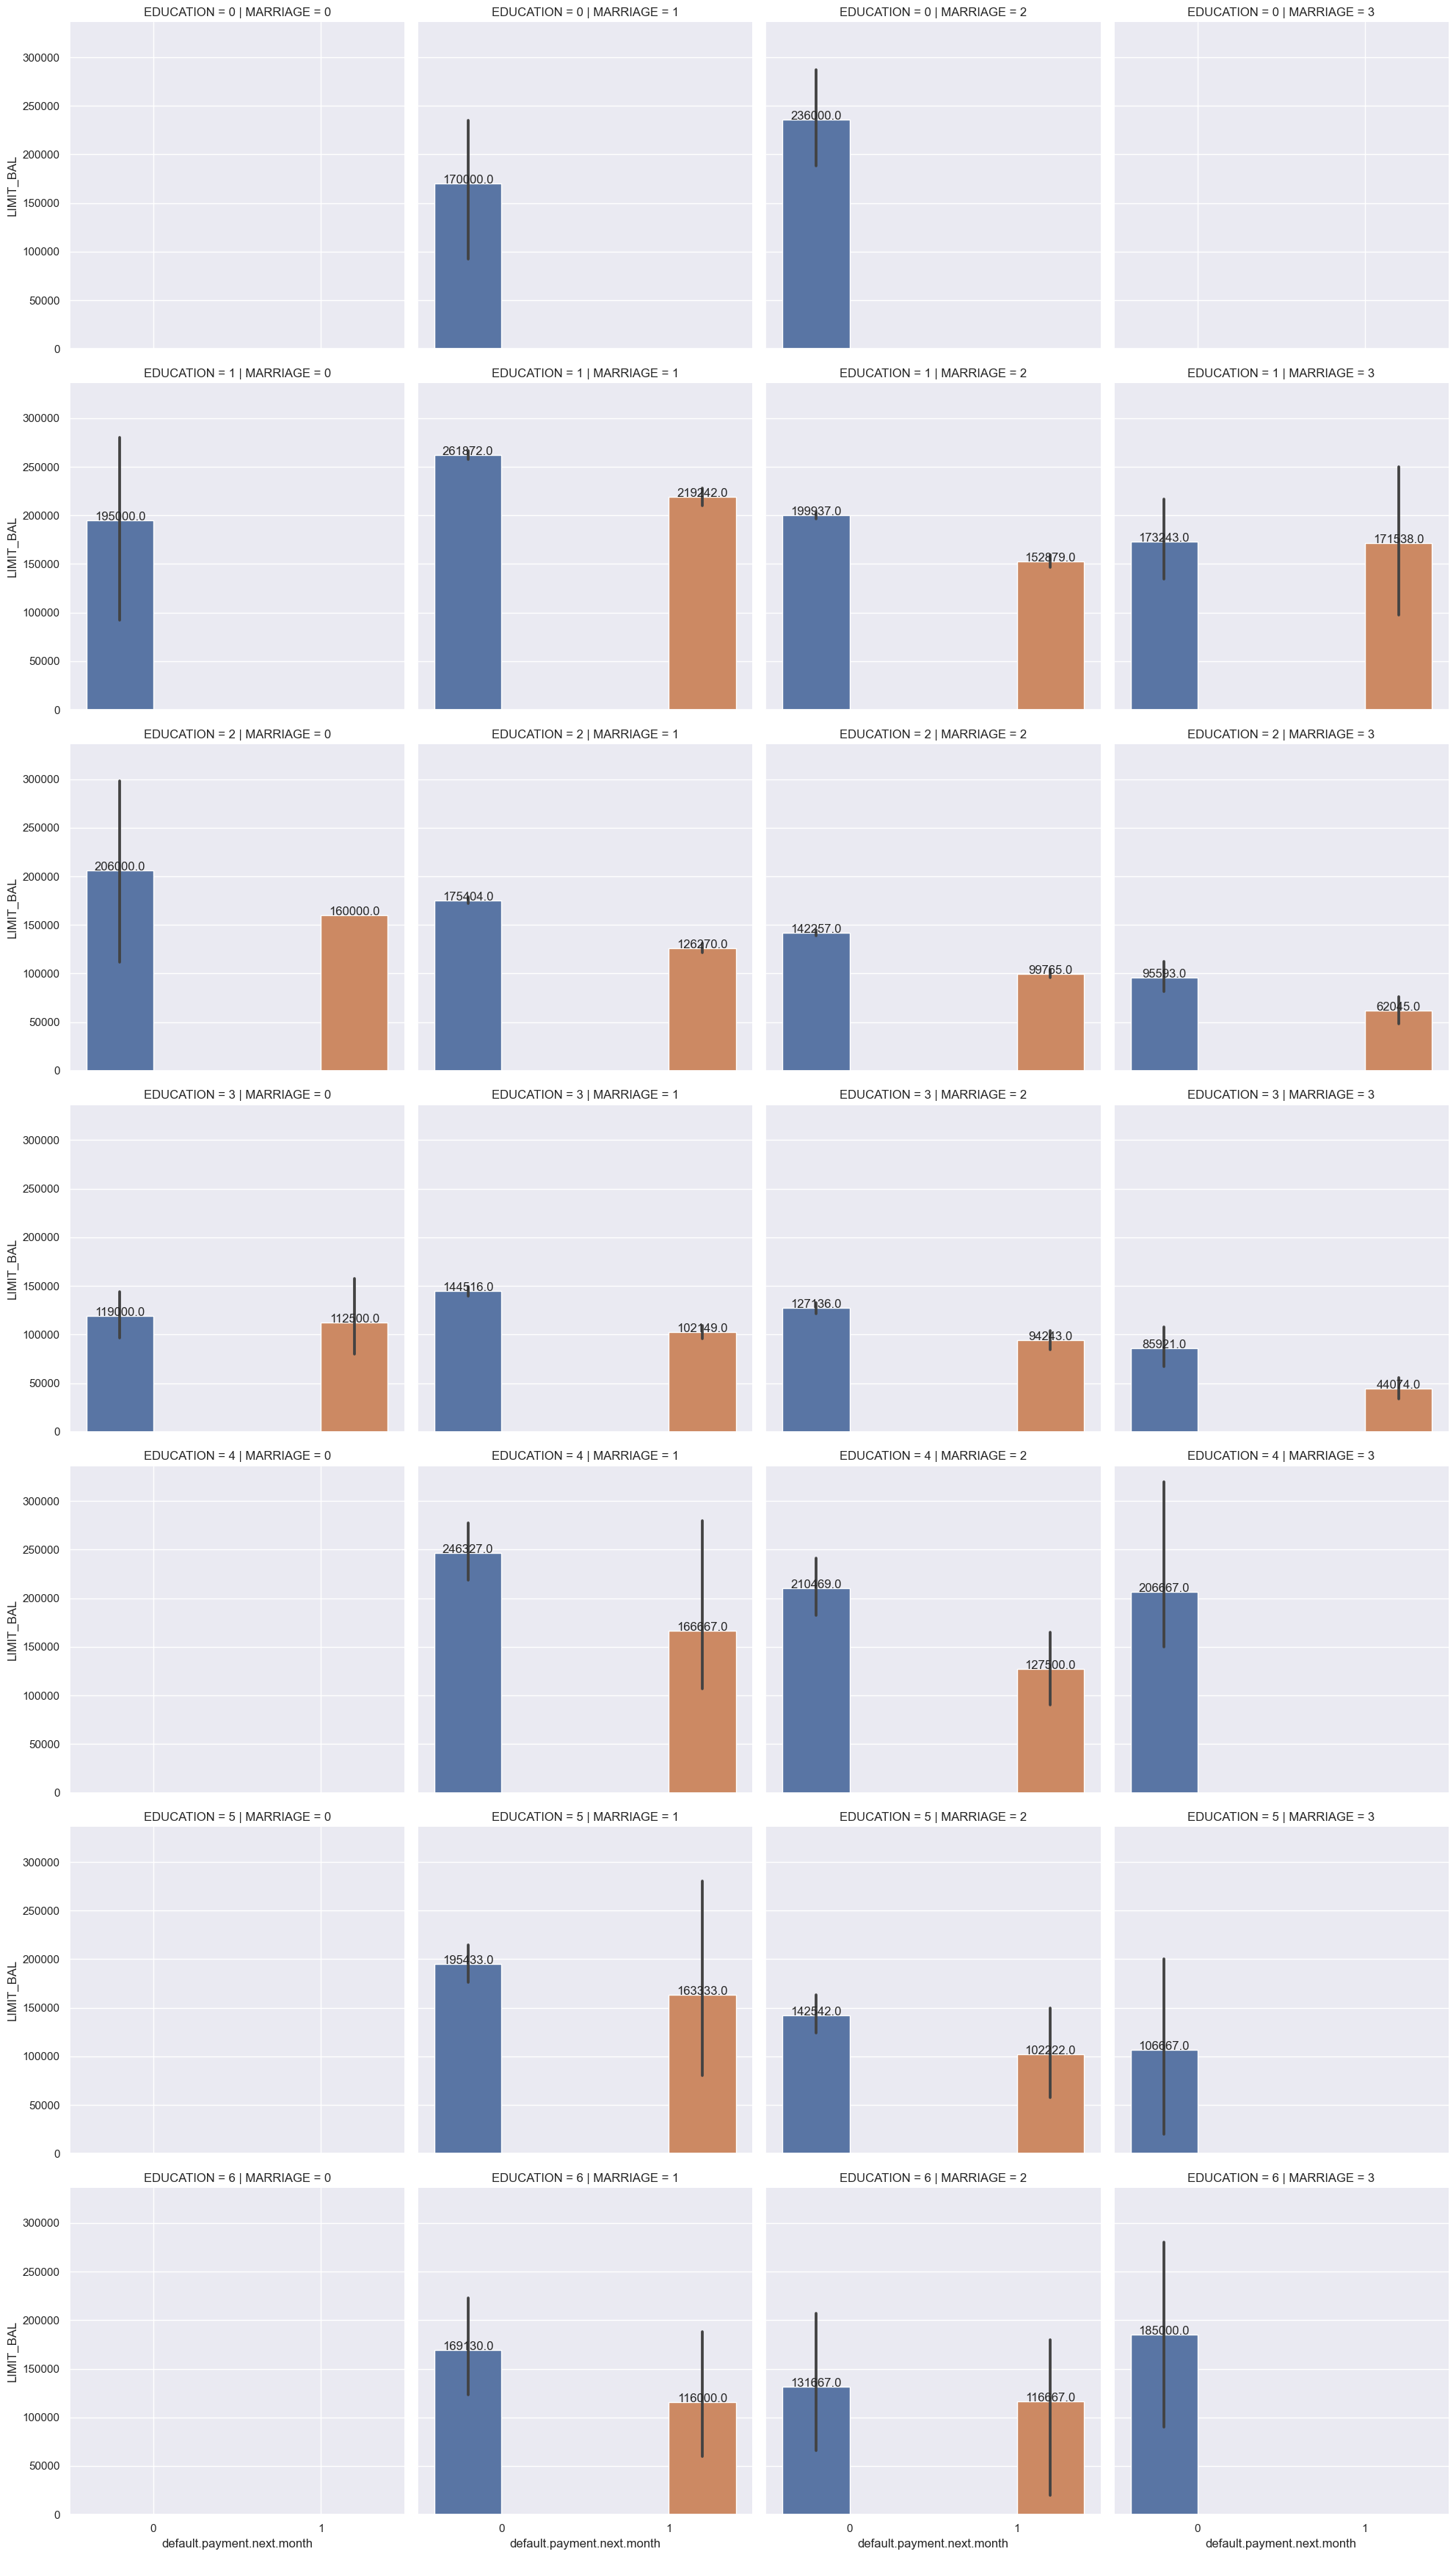

In [31]:
g = sns.catplot(
    data = df, x = 'default.payment.next.month',col= 'MARRIAGE',row = 'EDUCATION',y = 'LIMIT_BAL',kind = 'bar',hue = 'default.payment.next.month'
)
for ax in g.axes.flat:
    for p in ax.patches:
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.text(x,y, f'{round(float(y),0)}', ha='center',fontsize=12)


**Conclusion**

* **Marital Status Influence:** It's observed that, in general, married users tend to utilize credit services more frequently than single users.
* **Marriage and Education Impact:** Users belonging to the married category and having a graduate education background are notably more inclined to use credit services compared to other combinations of marital status and education levels.
* **Default Patterns:** Users who do not have a graduate, university, or high school education tend to exhibit a higher default rate of approximately 30%-40%, regardless of their marital status.
* **Risk in Graduate Users with 'Other' Category:** Graduate users categorized as 'Other' demonstrate a substantial 50% chance of defaulting on their credit card payments.

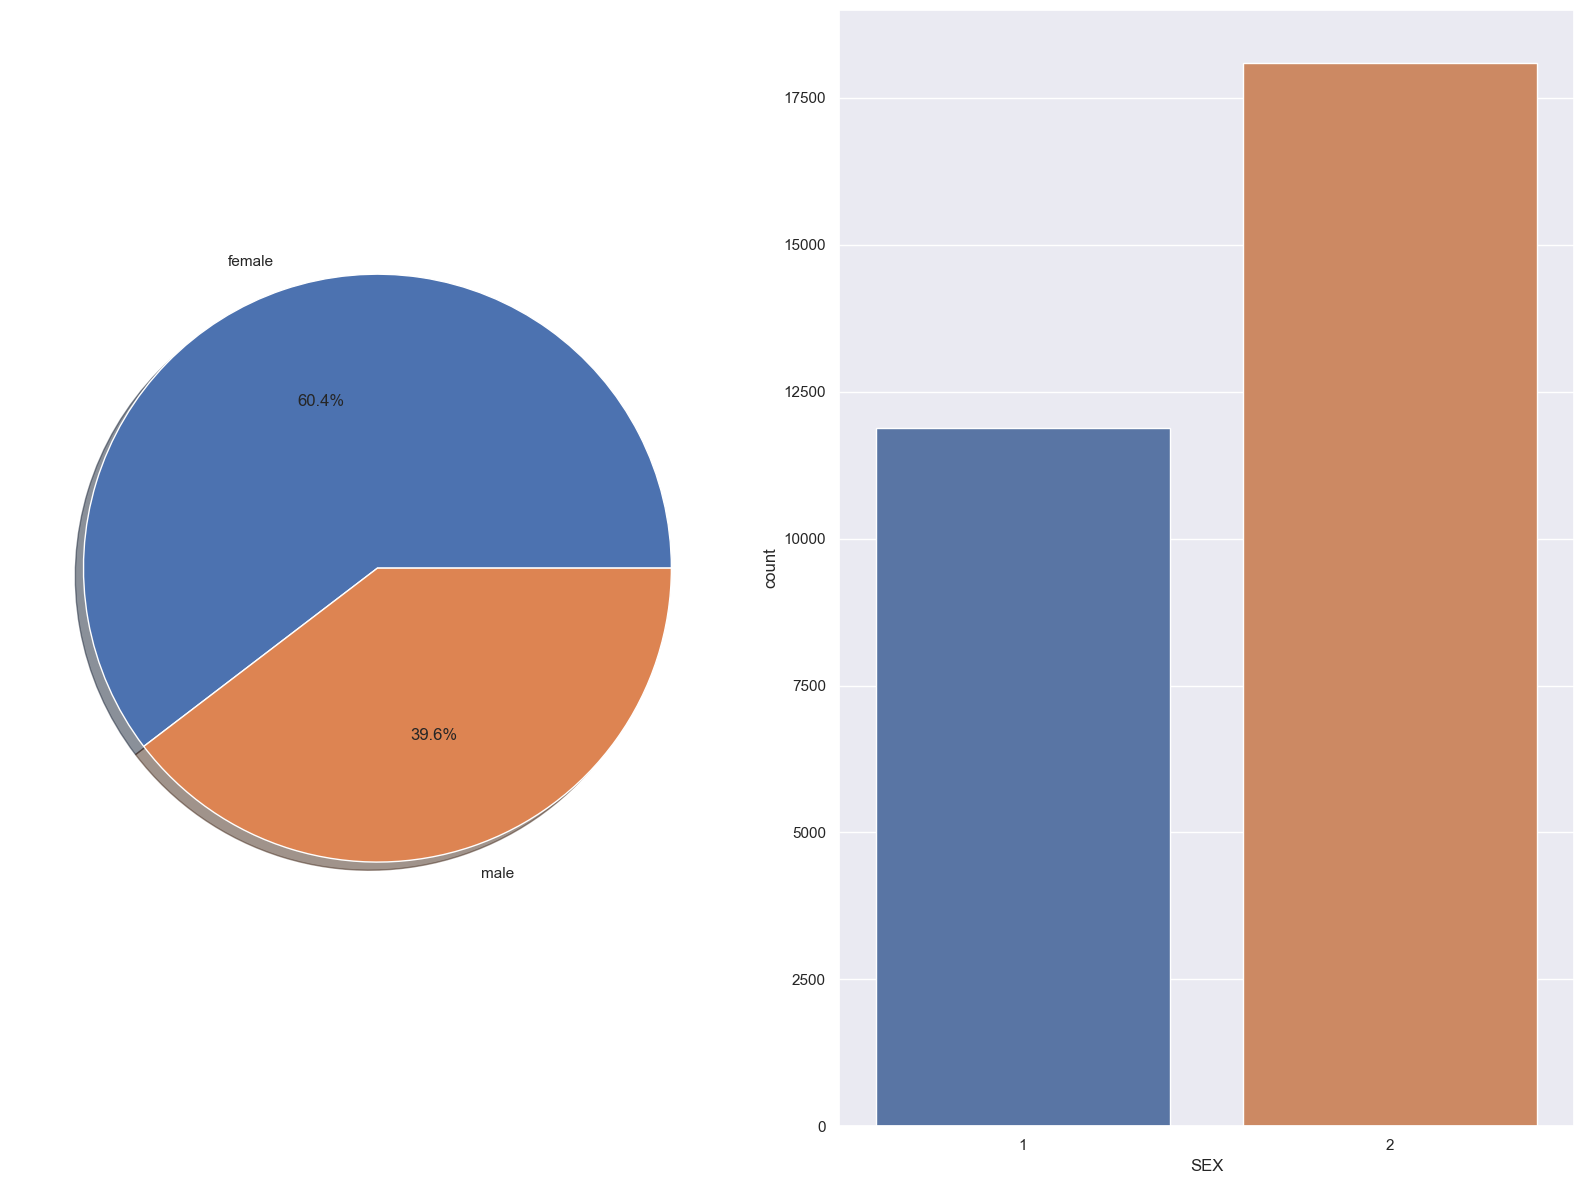

In [32]:
df['SEX'].value_counts()
labels = ['female','male']
values = df['SEX'].value_counts().values

fig, ax = plt.subplots(1,2)
ax[0].pie(values, labels = labels, autopct='%1.1f%%', shadow = True)
sns.countplot(
    data = df, x = 'SEX', ax=ax[1]
)
plt.tight_layout()
plt.show()

Text(0.5, 0, 'Limited Balance')

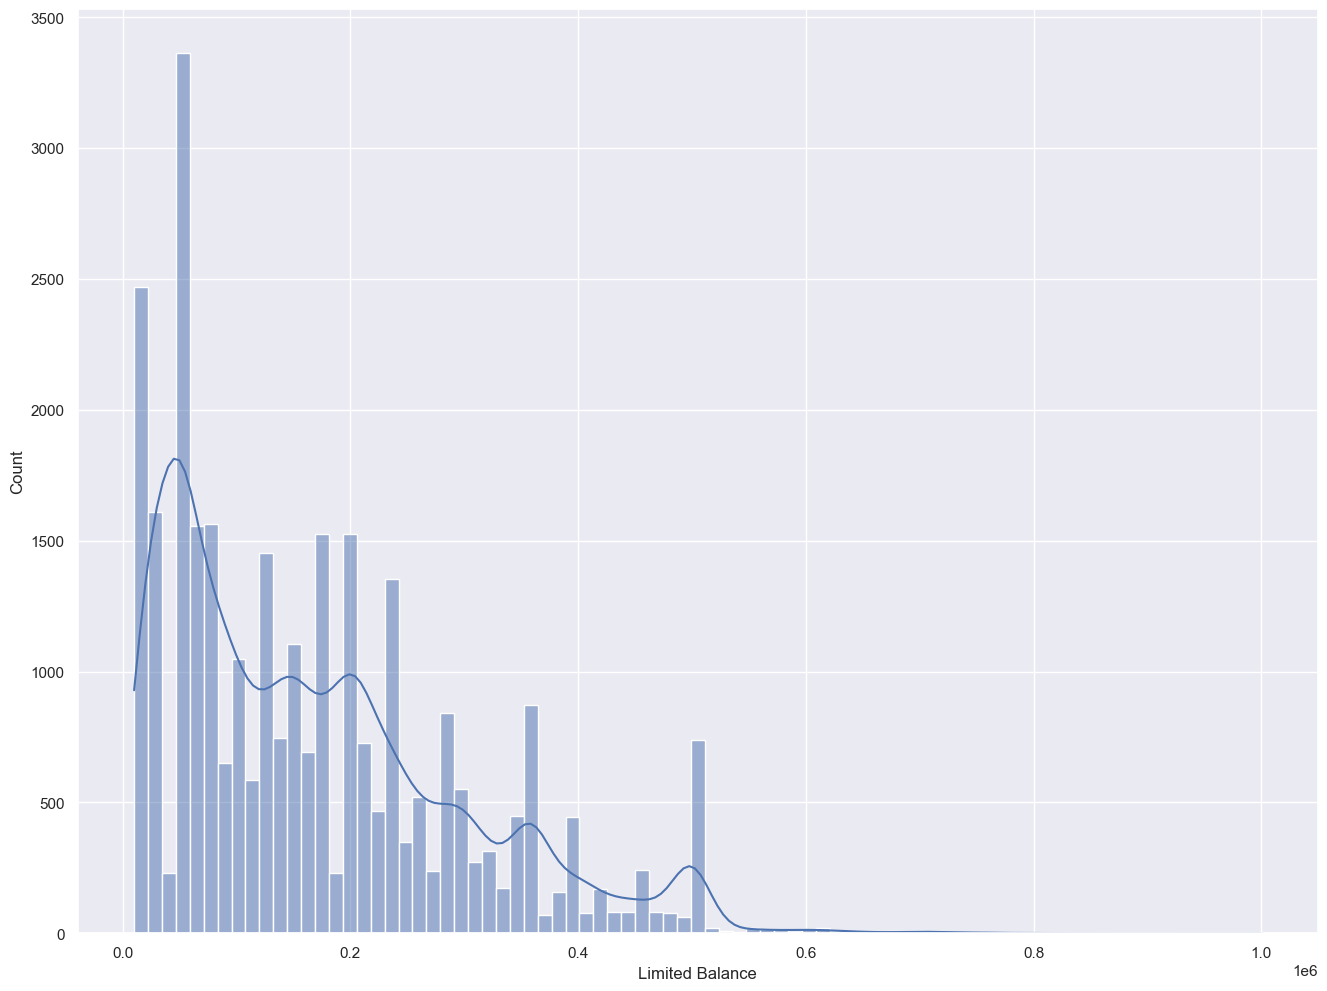

In [35]:
# Limited balance
sns.histplot(
    df['LIMIT_BAL'], kde=True
)
plt.xlabel('Limited Balance')

<Axes: xlabel='AGE', ylabel='Count'>

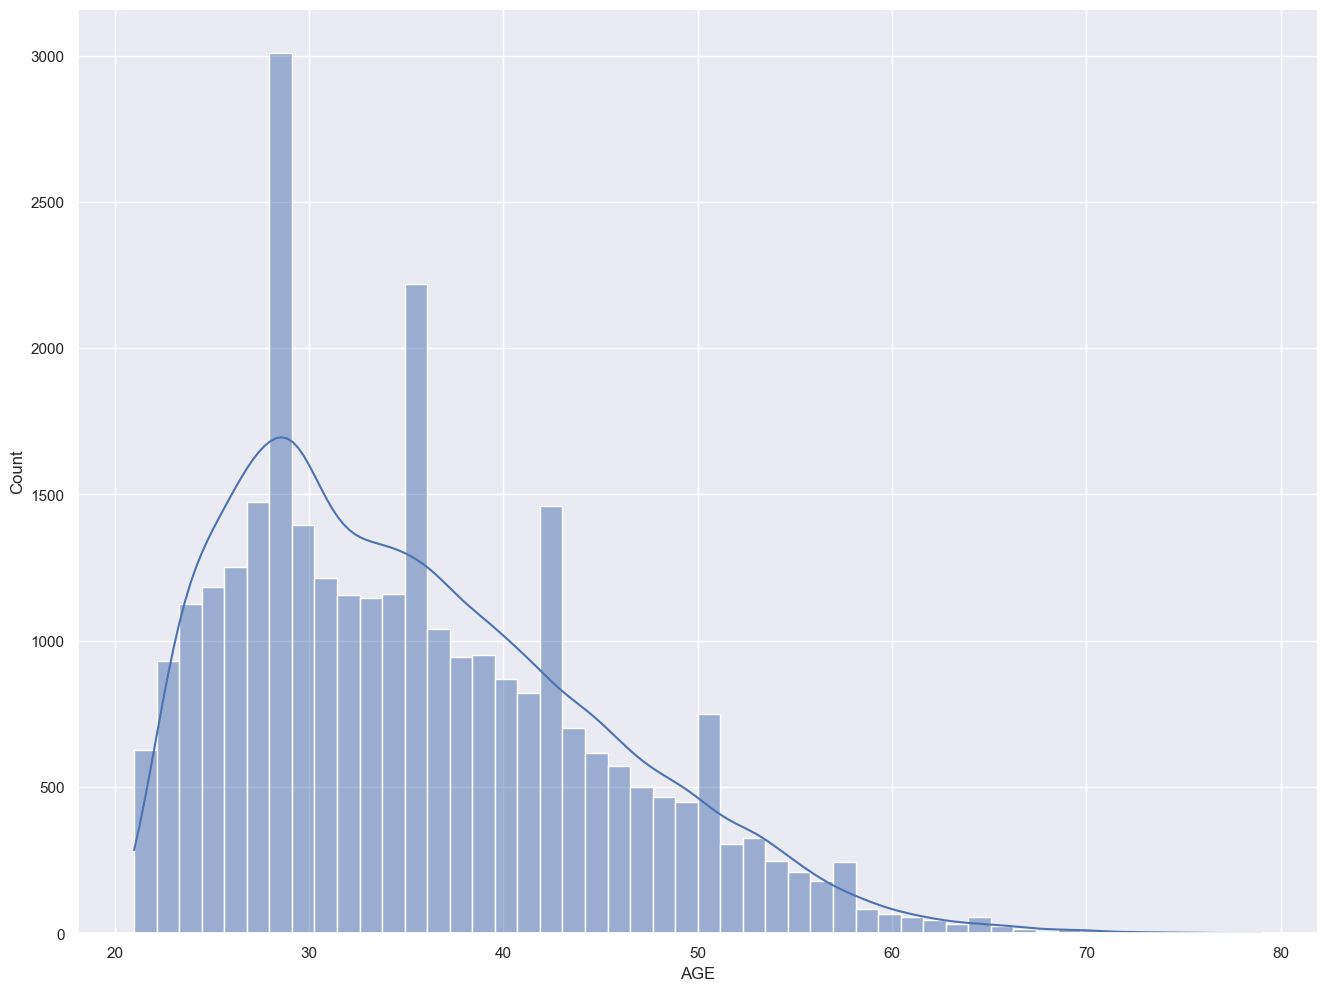

In [37]:
sns.histplot(
    df['AGE'] , kde=True, bins = 50
)

# Feature Engineering

## Handling Unbalanced dataset using SMOTE

<Axes: xlabel='BILL_AMT1', ylabel='LIMIT_BAL'>

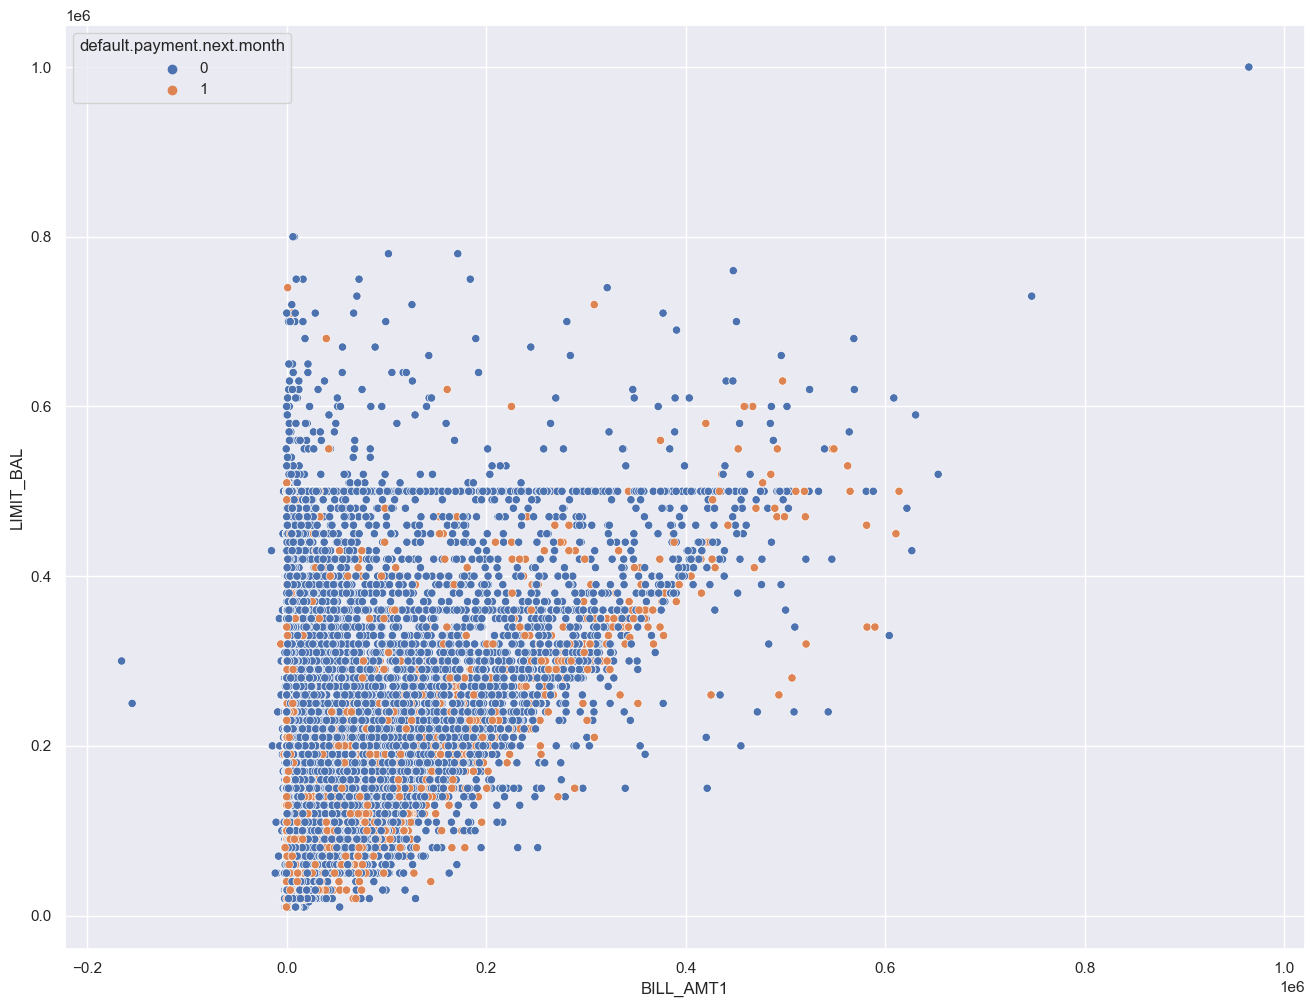

In [39]:
sns.scatterplot(
    data = df, x='BILL_AMT1',y = 'LIMIT_BAL', hue= 'default.payment.next.month',
)

**Interpretations**
* Non defaulters are outperforming in a very large number
* Need to balance the dataset by oversampling

In [62]:
from imblearn.combine import SMOTETomek
# splitting X and y

X = df.drop('default.payment.next.month',axis = 1)
y = df["default.payment.next.month"]

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=-1)

# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X, y)


In [69]:
y_res.value_counts()

1    22688
0    22688
Name: default.payment.next.month, dtype: int64